<a href="https://colab.research.google.com/github/prathamchintamani/pytorch_exercise/blob/main/pytorch_exercise_1_withsomenoise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt

In [3]:
if torch.cuda.is_available():
  device = "cuda"
else:
  device = "cpu"

device

'cuda'

In [30]:
weight = 0.3
bias = 0.9

start = 0
end = 2
step = 0.01
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

delta_y = torch.randn(y.shape)*0.01
y += delta_y

X[:10], y[:10]

(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400],
         [0.0500],
         [0.0600],
         [0.0700],
         [0.0800],
         [0.0900]]),
 tensor([[0.8896],
         [0.9122],
         [0.8930],
         [0.8979],
         [0.8998],
         [0.9267],
         [0.9074],
         [0.9198],
         [0.9149],
         [0.9305]]))

In [31]:
train_split = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(160, 160, 40, 40)

In [32]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

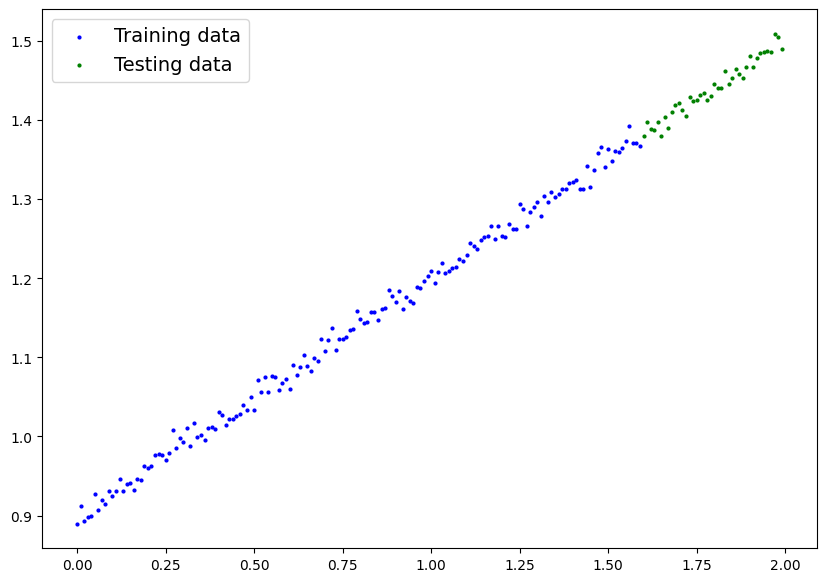

In [33]:
plot_predictions();

In [34]:
class LinearRegressorModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,dtype = torch.float32),requires_grad = True)
    self.bias = nn.Parameter(torch.randn(1,dtype = torch.float32),requires_grad = True)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights*x + self.bias

In [35]:
torch.manual_seed(2)

model_0 = LinearRegressorModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3923], requires_grad=True),
 Parameter containing:
 tensor([-0.2236], requires_grad=True)]

In [36]:
with torch.inference_mode():
    y_preds = model_0(X_test)

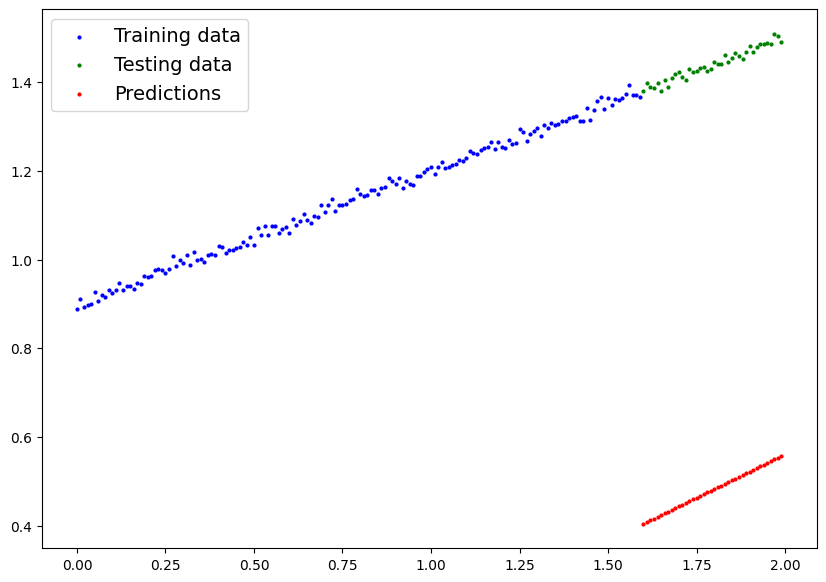

In [37]:
plot_predictions(predictions=y_preds)

In [38]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.Adam(params = model_0.parameters(), lr = 0.01)

In [39]:
torch.manual_seed(2)

epochs = 1000
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    ### Training

    # Put model in training mode (this is the default state of a model)
    model_0.train()

    # 1. Forward pass on train data using the forward() method inside
    y_pred = model_0(X_train)
    # print(y_pred)

    # 2. Calculate the loss (how different are our models predictions to the ground truth)
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad of the optimizer
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Progress the optimizer
    optimizer.step()

    ### Testing

    # Put the model in evaluation mode
    model_0.eval()

    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = model_0(X_test)

      # 2. Caculate loss on test data
      test_loss = loss_fn(test_pred, y_test.type(torch.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

      # Print out what's happening
      if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 1.050571322441101 | MAE Test Loss: 0.9315353631973267 
Epoch: 10 | MAE Train Loss: 0.8710715174674988 | MAE Test Loss: 0.6520353555679321 
Epoch: 20 | MAE Train Loss: 0.6915715336799622 | MAE Test Loss: 0.3725355863571167 
Epoch: 30 | MAE Train Loss: 0.5120716094970703 | MAE Test Loss: 0.09303571283817291 
Epoch: 40 | MAE Train Loss: 0.3372369408607483 | MAE Test Loss: 0.18519940972328186 
Epoch: 50 | MAE Train Loss: 0.2638494074344635 | MAE Test Loss: 0.40314602851867676 
Epoch: 60 | MAE Train Loss: 0.24881140887737274 | MAE Test Loss: 0.5046956539154053 
Epoch: 70 | MAE Train Loss: 0.23919177055358887 | MAE Test Loss: 0.5132184624671936 
Epoch: 80 | MAE Train Loss: 0.2257489264011383 | MAE Test Loss: 0.4758853018283844 
Epoch: 90 | MAE Train Loss: 0.2104427069425583 | MAE Test Loss: 0.42044559121131897 
Epoch: 100 | MAE Train Loss: 0.19524909555912018 | MAE Test Loss: 0.3676910996437073 
Epoch: 110 | MAE Train Loss: 0.17987942695617676 | MAE Test Loss: 0.33

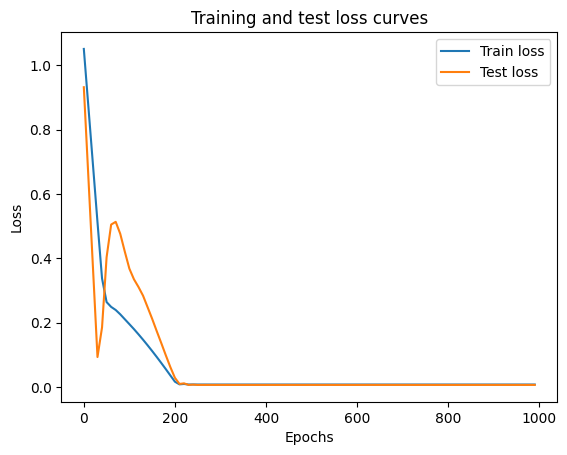

In [40]:
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [41]:
print("The model learned the following values for weights and bias:")
print(model_0.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('weights', tensor([0.3031])), ('bias', tensor([0.8974]))])

And the original values for weights and bias are:
weights: 0.3, bias: 0.9


In [42]:
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)

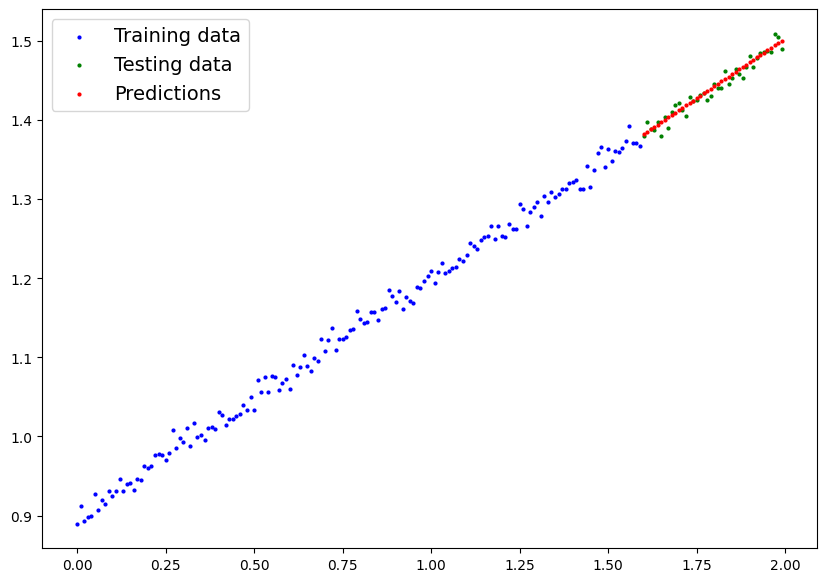

In [43]:
plot_predictions(predictions=y_preds)